<a href="https://colab.research.google.com/github/flamorim/BI-Master-2021.1/blob/main/trab_2021_09_24_Startups_LR_base_flavio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

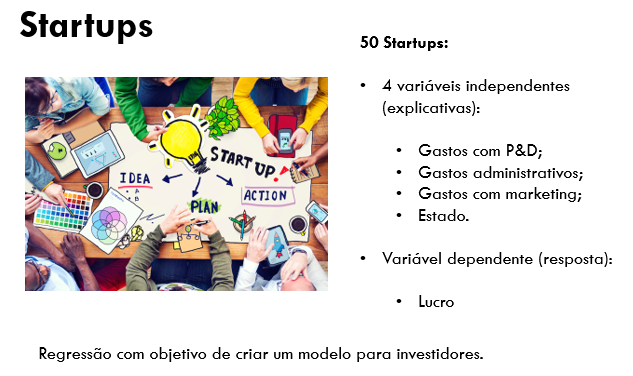


# Teste de Inner Join

In [33]:
import pandas as pd

# Cadastro da loja a
cadastro_a = {'Id': ['AA2930','BB4563','CC2139','DE2521','GT3462','HH1158'],
'Nome': ['Andre', 'Amanda', 'Bruna', 'Carlos', 'Jose', 'Maria'],
'Idade': [20,35,40,54,29,25],
'CEP': ['00092-029','11111-111','22222-888','00000-999','99999-111','55555-666']
}

cadastro_a = pd.DataFrame(cadastro_a, columns = ['Id','Nome','Idade','CEP'])
print(cadastro_a)

# Cadastro da loja b
cadastro_b = {'Id': ['CC9999','EF4488','DD9999','GT3462','HH1158'],
'Nome': ['Marcos', 'Patricia', 'Rafaela', 'Jose', 'Maria'],
'Idade': [19,30,22,29,25],
'CEP': ['00092-029','11111-111','22222-888','99999-111','55555-666']
}

cadastro_b = pd.DataFrame(cadastro_b, columns = ['Id','Nome','Idade','CEP'])
print(cadastro_b)

# Registro de compras de todas unidades
compras = {'Id': ['AA2930','EF4488','CC2139','EF4488','CC9999','AA2930','HH1158','HH1158'],
'Data': ['2019-01-01','2019-01-30','2019-01-30','2019-02-01','2019-02-20','2019-03-15','2019-04-01','2019-04-10'],
'Valor': [200,100,40,150,300,25,50,500]
}

compras = pd.DataFrame(compras, columns = ['Id','Data','Valor'])
print(compras)

       Id    Nome  Idade        CEP
0  AA2930   Andre     20  00092-029
1  BB4563  Amanda     35  11111-111
2  CC2139   Bruna     40  22222-888
3  DE2521  Carlos     54  00000-999
4  GT3462    Jose     29  99999-111
5  HH1158   Maria     25  55555-666
       Id      Nome  Idade        CEP
0  CC9999    Marcos     19  00092-029
1  EF4488  Patricia     30  11111-111
2  DD9999   Rafaela     22  22222-888
3  GT3462      Jose     29  99999-111
4  HH1158     Maria     25  55555-666
       Id        Data  Valor
0  AA2930  2019-01-01    200
1  EF4488  2019-01-30    100
2  CC2139  2019-01-30     40
3  EF4488  2019-02-01    150
4  CC9999  2019-02-20    300
5  AA2930  2019-03-15     25
6  HH1158  2019-04-01     50
7  HH1158  2019-04-10    500


In [34]:
pd.merge(compras, cadastro_a, on="Id", how="inner")

,Id,Data,Valor,Nome,Idade,CEP
0,AA2930,2019-01-01,200,Andre,20,00092-029
1,AA2930,2019-03-15,25,Andre,20,00092-029
2,CC2139,2019-01-30,40,Bruna,40,22222-888
3,HH1158,2019-04-01,50,Maria,25,55555-666
4,HH1158,2019-04-10,500,Maria,25,55555-666


## Carregar base de Dados

In [1]:
# Importação dos pacotes
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import f_regression

# Seed para reprodução de resultados
seed = 10
random.seed(seed)
np.random.seed(seed)

# Importar e entender os 5 arquivos CSV

In [ ]:
data = pd.read_csv('50_Startups.csv', index_col=0)
# ja criou o indice da tabela
data.head()

In [3]:
data_Produto_Neutro = pd.read_csv('Produto_Neutro.csv')
#nao sera usado, tem informacoes do fabricante
#data_ItemVenda_Neutro.describe()
data_Produto_Neutro.head()

,codBarra,codBarraReal,nome,UnMedida,fabricante,idCat,idSC1,idSC2
0,1,7890100094077,Produto_37308,UN,Fabricante_919,1,2,6
1,2,7890100094084,Produto_37306,UN,Fabricante_919,1,2,6
2,3,7890100219449,Produto_37307,UN,Fabricante_919,1,2,6
3,4,7899315900883,Produto_39720,UN,Fabricante_144,1,6,13
4,5,7899315901644,Produto_39721,UN,Fabricante_144,1,6,13


In [2]:
data_ItemVenda_Neutro = pd.read_csv('ItemVenda_Neutro.csv')
# SERA USADO EM CONJUNTO COM Venda_Neutro para pegar dele a data da venda
#data_ItemVenda_Neutro.describe()
data_ItemVenda_Neutro.head()

,idNotaVenda,idProduto,quantidade,descontoUnitario,valorUnitario
0,1,7465,1.0,5.00,12.99
1,1,12391,2.0,1.19,7.99
2,2,41988,1.0,-4.85,39.90
3,2,47023,1.0,-0.26,72.99
4,3,13779,60.0,0.66,1.65


In [3]:
data_ItemVenda_Neutro.shape

(353801, 5)

In [4]:
#erro na base com desconto negativo. O cliente relatou que é só trocar o sinal
data_ItemVenda_Neutro['descontoUnitario']=data_ItemVenda_Neutro['descontoUnitario'].abs()
data_ItemVenda_Neutro.head()

,idNotaVenda,idProduto,quantidade,descontoUnitario,valorUnitario
0,1,7465,1.0,5.00,12.99
1,1,12391,2.0,1.19,7.99
2,2,41988,1.0,4.85,39.90
3,2,47023,1.0,0.26,72.99
4,3,13779,60.0,0.66,1.65


In [5]:
data_ItemVenda_Neutro.shape

(353801, 5)

In [6]:
#IMPORTANTE POIS O MODELO SERA APLICADO NOS PRODUTOS QUE MOVIMENTAM MAIS VALOR FINANCEIRO
data_ItemVenda_Neutro['valortotalvenda']=data_ItemVenda_Neutro['quantidade']*(data_ItemVenda_Neutro['valorUnitario']-data_ItemVenda_Neutro['descontoUnitario'])
data_ItemVenda_Neutro.head()

,idNotaVenda,idProduto,quantidade,descontoUnitario,valorUnitario,valortotalvenda
0,1,7465,1.0,5.00,12.99,7.99
1,1,12391,2.0,1.19,7.99,13.60
2,2,41988,1.0,4.85,39.90,35.05
3,2,47023,1.0,0.26,72.99,72.73
4,3,13779,60.0,0.66,1.65,59.40


In [7]:
data_Venda_Neutro = pd.read_csv('Venda_Neutro.csv')
# SERA USADO EM CONJUNTO COM Venda_Neutro para recuperar a data da venda
#data_Venda_Neutro.describe()
data_Venda_Neutro.head(100)

,idNotaVenda,codigoNotaCliente,idUnidade,tipovenda,dataVenda,hora,valorPago
0,1,17.0,1,1,2018-12-08,00:00:00.0000,21.59
1,2,74.0,1,1,2018-10-26,00:00:00.0000,118.00
2,3,276.0,1,1,2018-09-25,00:00:00.0000,79.20
3,4,293.0,1,1,2018-10-11,00:00:00.0000,35.40
4,5,294.0,1,1,2018-10-11,00:00:00.0000,93.98
...,...,...,...,...,...,...,...
95,96,2571.0,1,1,2018-10-19,00:00:00.0000,498.33
96,97,2572.0,1,1,2018-10-19,00:00:00.0000,159.90
97,98,2573.0,1,1,2018-10-19,00:00:00.0000,63.96
98,99,2574.0,1,1,2018-10-19,00:00:00.0000,19.99


In [8]:
data_Venda_Neutro.shape

(115325, 7)

In [9]:
#Este e'o primeiro dataset, que e'o inner join para obter a data da venda atraves do id de venda 
dataset = pd.merge(data_ItemVenda_Neutro, data_Venda_Neutro, on="idNotaVenda", how="inner")

In [10]:
print(dataset.shape)
print(data_ItemVenda_Neutro.shape)
print(data_Venda_Neutro.shape)

(353801, 12)
(353801, 6)
(115325, 7)


In [11]:
dataset.describe()

,idNotaVenda,idProduto,quantidade,descontoUnitario,valorUnitario,valortotalvenda,codigoNotaCliente,idUnidade,tipovenda,valorPago
count,353801.000000,353801.000000,353801.000000,353801.000000,353801.000000,353801.000000,3.538010e+05,353801.0,353801.0,353801.000000
mean,60413.324849,23216.141721,6.017453,6.614984,41.498397,75.671342,2.569414e+05,1.0,1.0,1227.379209
std,32556.921301,15538.277096,148.506703,24.612645,135.203989,787.685883,7.077255e+06,0.0,0.0,17750.399260
min,1.000000,7.000000,0.000000,0.000000,0.000000,-4815.216000,1.700000e+01,1.0,1.0,0.000000
25%,32083.000000,10086.000000,1.000000,0.000000,6.190000,8.990000,1.290170e+05,1.0,1.0,59.970000
50%,61242.000000,20896.000000,1.000000,0.000000,14.990000,19.990000,2.765590e+05,1.0,1.0,159.900000
75%,88461.000000,38419.000000,2.000000,4.410000,32.990000,57.990000,3.207990e+05,1.0,1.0,416.520000
max,115325.000000,47816.000000,40305.440000,1900.910000,5890.000000,274977.500000,2.975630e+09,1.0,1.0,870070.940000


In [12]:
dataset.tail()

,idNotaVenda,idProduto,quantidade,descontoUnitario,valorUnitario,valortotalvenda,codigoNotaCliente,idUnidade,tipovenda,dataVenda,hora,valorPago
353796,115324,10457,2.0,2.26,21.99,39.46,937351.0,1,1,2018-11-28,00:00:00.0000,101.50
353797,115324,10461,2.0,1.26,20.99,39.46,937351.0,1,1,2018-11-28,00:00:00.0000,101.50
353798,115324,45496,1.0,1.60,20.99,19.39,937351.0,1,1,2018-11-28,00:00:00.0000,101.50
353799,115325,42651,2.0,1.90,20.99,38.18,937363.0,1,1,2018-11-28,00:00:00.0000,58.58
353800,115325,42654,1.0,1.58,21.99,20.41,937363.0,1,1,2018-11-28,00:00:00.0000,58.58


In [13]:
colunas_desnecessarias =  ['codigoNotaCliente','idUnidade', 'tipovenda', 'hora','valorPago']
dataset = dataset.drop(columns=colunas_desnecessarias)

In [14]:
#tem 79 linhas com preco unitario == 0, mas isso nao e problema, pois as analises serao em quantidade
dataset[dataset.valorUnitario == 0]

,idNotaVenda,idProduto,quantidade,descontoUnitario,valorUnitario,valortotalvenda,dataVenda
111,56,41715,10.0,4.65,0.0,-46.50,2018-10-19
112,56,41716,40.0,4.65,0.0,-186.00,2018-10-19
113,56,41719,10.0,4.65,0.0,-46.50,2018-10-19
114,56,41720,6.0,4.65,0.0,-27.90,2018-10-19
115,56,41722,10.0,4.65,0.0,-46.50,2018-10-19
...,...,...,...,...,...,...,...
353736,115280,47273,2.0,22.19,0.0,-44.38,2018-11-13
353739,115282,47256,1.0,68.64,0.0,-68.64,2018-11-22
353740,115282,47421,1.0,20.02,0.0,-20.02,2018-11-22
353741,115282,47422,1.0,20.02,0.0,-20.02,2018-11-22


In [15]:
#NAO ACONTECEU MAIS
#tem 3 registros com erro na data de venda. Serao corrigidos usando a data do ticker anterior
dataset.tail(-5)

,idNotaVenda,idProduto,quantidade,descontoUnitario,valorUnitario,valortotalvenda,dataVenda
5,3,13785,20.0,0.66,1.65,19.80,2018-09-25
6,4,596,6.0,0.00,5.90,35.40,2018-10-11
7,5,26389,2.0,0.00,46.99,93.98,2018-10-11
8,6,2659,2.0,0.16,2.99,5.66,2018-10-11
9,6,2718,1.0,0.14,2.99,2.85,2018-10-11
...,...,...,...,...,...,...,...
353796,115324,10457,2.0,2.26,21.99,39.46,2018-11-28
353797,115324,10461,2.0,1.26,20.99,39.46,2018-11-28
353798,115324,45496,1.0,1.60,20.99,19.39,2018-11-28
353799,115325,42651,2.0,1.90,20.99,38.18,2018-11-28


In [91]:
#NAO ACONTECEU MAIS
#dataset.iloc[-1,6] = dataset.iloc[-2,6] = dataset.iloc[-3,6] = dataset.iloc[-4,6]

In [16]:
dataset.tail(-5)

,idNotaVenda,idProduto,quantidade,descontoUnitario,valorUnitario,valortotalvenda,dataVenda
5,3,13785,20.0,0.66,1.65,19.80,2018-09-25
6,4,596,6.0,0.00,5.90,35.40,2018-10-11
7,5,26389,2.0,0.00,46.99,93.98,2018-10-11
8,6,2659,2.0,0.16,2.99,5.66,2018-10-11
9,6,2718,1.0,0.14,2.99,2.85,2018-10-11
...,...,...,...,...,...,...,...
353796,115324,10457,2.0,2.26,21.99,39.46,2018-11-28
353797,115324,10461,2.0,1.26,20.99,39.46,2018-11-28
353798,115324,45496,1.0,1.60,20.99,19.39,2018-11-28
353799,115325,42651,2.0,1.90,20.99,38.18,2018-11-28


In [17]:
dataset.describe()

,idNotaVenda,idProduto,quantidade,descontoUnitario,valorUnitario,valortotalvenda
count,353801.000000,353801.000000,353801.000000,353801.000000,353801.000000,353801.000000
mean,60413.324849,23216.141721,6.017453,6.614984,41.498397,75.671342
std,32556.921301,15538.277096,148.506703,24.612645,135.203989,787.685883
min,1.000000,7.000000,0.000000,0.000000,0.000000,-4815.216000
25%,32083.000000,10086.000000,1.000000,0.000000,6.190000,8.990000
50%,61242.000000,20896.000000,1.000000,0.000000,14.990000,19.990000
75%,88461.000000,38419.000000,2.000000,4.410000,32.990000,57.990000
max,115325.000000,47816.000000,40305.440000,1900.910000,5890.000000,274977.500000


IMPORTANTE: REMOVIDA AS LINHAS COM QUANTIDADE = 0 / DEPOIS É NECESSARIO TRATAR DE OUTRA FORMA

In [18]:
dataset.loc[dataset['quantidade'] == 0]

,idNotaVenda,idProduto,quantidade,descontoUnitario,valorUnitario,valortotalvenda,dataVenda
3256,721,12962,0.0,0.0,4899.99,0.0,2018-09-26
27047,10107,12970,0.0,0.0,5890.00,0.0,2018-12-10
36597,13856,12962,0.0,0.0,4899.99,0.0,2018-12-17


In [19]:
dataset.shape

(353801, 7)

In [20]:
#remover as linhas que tem quantidade de venda = 0
dataset = dataset.loc[dataset['quantidade'] > 0]
dataset.shape

(353798, 7)

In [21]:
dataset.describe()

,idNotaVenda,idProduto,quantidade,descontoUnitario,valorUnitario,valortotalvenda
count,353798.000000,353798.000000,353798.000000,353798.000000,353798.000000,353798.000000
mean,60413.767350,23216.228647,6.017504,6.615040,41.454402,75.671983
std,32556.700713,15538.314299,148.507332,24.612741,134.350863,787.689191
min,1.000000,7.000000,0.010000,0.000000,0.000000,-4815.216000
25%,32083.000000,10086.000000,1.000000,0.000000,6.190000,8.990000
50%,61243.000000,20896.000000,1.000000,0.000000,14.990000,19.990000
75%,88461.750000,38419.000000,2.000000,4.410000,32.990000,57.990000
max,115325.000000,47816.000000,40305.440000,1900.910000,5890.000000,274977.500000


In [22]:
#salvo um arquivo somente para referencia
dataset.to_excel("base_raw.2021.09.23.xlsx",
             sheet_name='ItemVenda_Neutro',header=dataset.columns)  

In [23]:
dataset.head(100)

,idNotaVenda,idProduto,quantidade,descontoUnitario,valorUnitario,valortotalvenda,dataVenda
0,1,7465,1.0,5.00,12.99,7.99,2018-12-08
1,1,12391,2.0,1.19,7.99,13.60,2018-12-08
2,2,41988,1.0,4.85,39.90,35.05,2018-10-26
3,2,47023,1.0,0.26,72.99,72.73,2018-10-26
4,3,13779,60.0,0.66,1.65,59.40,2018-09-25
...,...,...,...,...,...,...,...
95,56,41646,45.0,38.09,67.99,1345.50,2018-10-19
96,56,41647,27.0,38.09,67.99,807.30,2018-10-19
97,56,41649,45.0,38.09,67.99,1345.50,2018-10-19
98,56,41651,117.0,38.09,67.99,3498.30,2018-10-19


# O modelo será executado para o produto que movimenta mais dinheiro

In [ ]:
NAO
escolher os produtos de mair movimentacao financeira
#dataset.[dataset['valorunitario'].max()]
var = dataset['valortotalvenda'].max()
#produto de maior valor
dataset[dataset['valorunitario'] == dataset['valorunitario'].max()]['idProduto'].squeeze()

In [39]:
#df_temp = dataset.groupby('idProduto')[],as_index=False).sum()
#f_temp agrupou por quantidade

temp = dataset.groupby('idProduto')['valortotalvenda'].sum()

In [42]:
temp.max()

501397.6499999979

In [ ]:
#PROBLEMA DE COMO IDENTIFICAR QUAL É O PRODUTO DE MAIOR VALOR

In [ ]:
feito pelo excel
Produto	Movimentacao
17745	501397,65
26525	344066,4
39526	284433,49
13236	219941,27
13024	176941,52
633	    170571,29

In [ ]:
temp.describe

# Nova seção

In [48]:
colunas_desnecessarias =  ['idNotaVenda','descontoUnitario', 'valorUnitario', 'valortotalvenda']
dataset = dataset.drop(columns=colunas_desnecessarias)
dataset.head(100)

,idProduto,quantidade,dataVenda
0,7465,1.0,2018-12-08
1,12391,2.0,2018-12-08
2,41988,1.0,2018-10-26
3,47023,1.0,2018-10-26
4,13779,60.0,2018-09-25
...,...,...,...
95,41646,45.0,2018-10-19
96,41647,27.0,2018-10-19
97,41649,45.0,2018-10-19
98,41651,117.0,2018-10-19


In [ ]:
#antes de fazer a pivit, agrupar

In [51]:
df_por_dia = dataset.groupby(['dataVenda','idProduto'],as_index=False).sum()
#fazer a pivot
df_por_dia = df_por_dia.pivot(index='dataVenda', columns='idProduto', values='quantidade')
df_por_dia


idProduto,7,11,16,17,18,21,22,23,25,28,29,30,54,56,86,95,100,103,105,108,111,114,115,119,147,175,204,205,210,213,229,257,258,259,260,281,282,283,284,285,...,47595,47598,47602,47606,47607,47612,47613,47630,47633,47634,47635,47636,47637,47638,47639,47640,47642,47643,47644,47651,47654,47655,47656,47658,47659,47663,47665,47667,47670,47674,47682,47683,47684,47685,47688,47693,47694,47704,47708,47816
dataVenda,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-09-23,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,1.0,NaN,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-09-24,NaN,NaN,NaN,NaN,NaN,10.0,12.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-09-25,NaN,NaN,NaN,NaN,NaN,5.0,12.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-09-26,NaN,NaN,NaN,NaN,NaN,24.0,40.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,4.0,3.0,3.0,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-09-27,NaN,NaN,NaN,NaN,NaN,5.0,6.0,NaN,3.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,1.0,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-24,NaN,NaN,NaN,NaN,NaN,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,NaN,NaN,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-26,NaN,NaN,2.0,NaN,NaN,6.0,8.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,3.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,2.0,1.0,4.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-27,NaN,NaN,3.0,1.0,5.0,9.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,1.0,2.0,3.0,NaN,2.0,1.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN


Nao ha atributos categoricos

# Retirando os missings

In [52]:
numeric_cols = df_por_dia.columns[[_type in [np.float64] for _type in df_por_dia.dtypes]]
numeric_cols

Int64Index([    7,    11,    16,    17,    18,    21,    22,    23,    25,
               28,
            ...
            47682, 47683, 47684, 47685, 47688, 47693, 47694, 47704, 47708,
            47816],
           dtype='int64', name='idProduto', length=18451)

In [53]:
#retirar on nulls
for col in numeric_cols:
    df_por_dia[col] = df_por_dia[col].fillna(0)

df_por_dia.head()

idProduto,7,11,16,17,18,21,22,23,25,28,29,30,54,56,86,95,100,103,105,108,111,114,115,119,147,175,204,205,210,213,229,257,258,259,260,281,282,283,284,285,...,47595,47598,47602,47606,47607,47612,47613,47630,47633,47634,47635,47636,47637,47638,47639,47640,47642,47643,47644,47651,47654,47655,47656,47658,47659,47663,47665,47667,47670,47674,47682,47683,47684,47685,47688,47693,47694,47704,47708,47816
dataVenda,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-09-23,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-09-24,0.0,0.0,0.0,0.0,0.0,10.0,12.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-09-25,0.0,0.0,0.0,0.0,0.0,5.0,12.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-09-26,0.0,0.0,0.0,0.0,0.0,24.0,40.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,3.0,3.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-09-27,0.0,0.0,0.0,0.0,0.0,5.0,6.0,0.0,3.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [54]:
df_por_dia.describe()

idProduto,7,11,16,17,18,21,22,23,25,28,29,30,54,56,86,95,100,103,105,108,111,114,115,119,147,175,204,205,210,213,229,257,258,259,260,281,282,283,284,285,...,47595,47598,47602,47606,47607,47612,47613,47630,47633,47634,47635,47636,47637,47638,47639,47640,47642,47643,47644,47651,47654,47655,47656,47658,47659,47663,47665,47667,47670,47674,47682,47683,47684,47685,47688,47693,47694,47704,47708,47816
count,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,...,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.00000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000
mean,0.010309,0.010309,0.144330,0.690722,0.979381,4.659794,8.175258,3.608247,0.030928,0.010309,0.020619,0.030928,0.041237,0.030928,0.020619,0.020619,0.092784,0.041237,0.092784,0.948454,0.020619,0.072165,0.020619,0.010309,0.092784,0.041237,0.020619,0.010309,0.010309,0.010309,0.030928,1.453608,0.072165,0.030928,0.989691,1.237113,0.371134,0.556701,0.536082,0.422680,...,0.020619,0.010309,0.010309,0.020619,0.020619,0.041237,0.123711,0.010309,0.072165,0.164948,0.226804,0.185567,0.268041,0.257732,0.268041,0.28866,0.051546,0.010309,0.687010,0.020619,0.010309,0.092784,0.020619,0.010309,0.494845,0.030928,0.010309,0.041237,0.010309,0.020619,0.103093,0.206186,0.072165,0.041237,0.010309,0.010309,0.072165,0.030928,0.020619,0.010309
std,0.101535,0.101535,0.577164,1.372049,2.478992,6.593694,9.715763,4.445402,0.304604,0.101535,0.142842,0.226090,0.199871,0.174022,0.203069,0.142842,0.913812,0.406138,0.458314,2.434009,0.142842,0.260105,0.142842,0.101535,0.817548,0.199871,0.203069,0.101535,0.101535,0.101535,0.304604,2.076759,0.297469,0.304604,2.018120,1.441738,0.711799,0.841243,0.829933,0.747706,...,0.203069,0.101535,0.101535,0.203069,0.203069,0.406138,1.218415,0.101535,0.297469,0.623839,0.669346,0.600866,0.952141,0.927343,0.810291,0.91240,0.334513,0.101535,6.766267,0.203069,0.101535,0.384124,0.142842,0.101535,4.873662,0.304604,0.101535,0.406138,0.101535,0.142842,0.549328,1.306539,0.360770,0.285684,0.101535,0.101535,0.330638,0.174022,0.203069,0.101535
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.

# Definir para qual produto o modelo sera aplicado  

In [ ]:
#sera feito para aquele que movimente o maior valor


## Dummy Coding

In [9]:
data = pd.get_dummies(data, columns=['State'], drop_first=True)
data.head()

KeyError: ignored

In [17]:
#data.Profit
#data['Profit']
data.loc[:,'Profit']


ID
1     192261.83
2     191792.06
3     191050.39
4     182901.99
5     166187.94
6     156991.12
7     156122.51
8     155752.60
9     152211.77
10    149759.96
11    146121.95
12    144259.40
13    141585.52
14    134307.35
15    132602.65
16    129917.04
17    126992.93
18    125370.37
19    124266.90
20    122776.86
21    118474.03
22    111313.02
23    110352.25
24    108733.99
25    108552.04
26    107404.34
27    105733.54
28    105008.31
29    103282.38
30    101004.64
31     99937.59
32     97483.56
33     97427.84
34     96778.92
35     96712.80
36     96479.51
37     90708.19
38     89949.14
39     81229.06
40     81005.76
41     78239.91
42     77798.83
43     71498.49
44     69758.98
45     65200.33
46     64926.08
47     49490.75
48     42559.73
49     35673.41
50     14681.40
Name: Profit, dtype: float64

## Separar base em treino e teste

In [ ]:
#o produto selecionado e'o 17745, cuja coluna tem o nome dele

In [70]:
df_por_dia.loc[:,df_por_dia.columns != 17745] 

idProduto,7,11,16,17,18,21,22,23,25,28,29,30,54,56,86,95,100,103,105,108,111,114,115,119,147,175,204,205,210,213,229,257,258,259,260,281,282,283,284,285,...,47595,47598,47602,47606,47607,47612,47613,47630,47633,47634,47635,47636,47637,47638,47639,47640,47642,47643,47644,47651,47654,47655,47656,47658,47659,47663,47665,47667,47670,47674,47682,47683,47684,47685,47688,47693,47694,47704,47708,47816
dataVenda,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-09-23,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-09-24,0.0,0.0,0.0,0.0,0.0,10.0,12.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-09-25,0.0,0.0,0.0,0.0,0.0,5.0,12.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-09-26,0.0,0.0,0.0,0.0,0.0,24.0,40.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,3.0,3.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-09-27,0.0,0.0,0.0,0.0,0.0,5.0,6.0,0.0,3.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-24,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-12-26,0.0,0.0,2.0,0.0,0.0,6.0,8.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,1.0,4.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-12-27,0.0,0.0,3.0,1.0,5.0,9.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,3.0,0.0,2.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [71]:
from sklearn.model_selection import train_test_split 
# Agora usaremos a função para fazer de fato a separação. Já faremos a separação em treino e teste e entrada e saída.
X = df_por_dia.loc[:,df_por_dia.columns != 17745]  # Entrada
#y = df_por_dia['17745']    # Saída
y = df_por_dia.loc[:,df_por_dia.columns == 17745]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [72]:
# Vamos olhar os shapes da bases de treino e teste
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(77, 18450)
(20, 18450)
(77, 1)
(20, 1)


# A PARTIR DAQUI USEI SERIE TEMPORAL

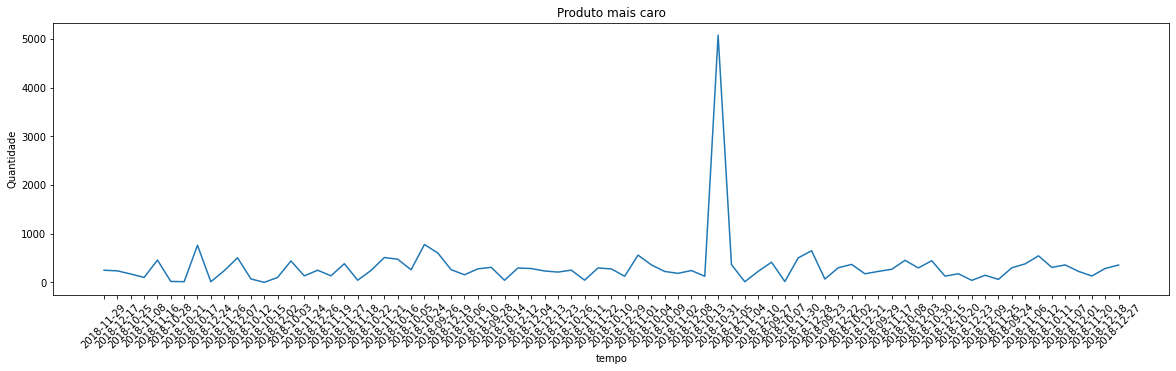

In [83]:
plt.figure(figsize=(20,5))
#plt.plot(df_prod_mais_caro)
#plt.plot(df_por_dia.loc[:,df_por_dia.columns == 17745])
plt.plot(y_train)
plt.xlabel("tempo")
plt.ylabel("Quantidade")
plt.title("Produto mais caro")
plt.xticks(rotation=45) # coloca somente 4 valores no eixo x e rotaciona 45 graus por questões de visualização
plt.savefig('Serie Historica.svg')
plt.show()

In [84]:
window = 7 # tem que testar
dataSize = len(X_train)
X = []  # e' uma lista - vetor
y = []
for i in range(window, dataSize):
    X.append(X_train.iloc[i-window:i, 0]) # poderia somar com o valor de 2 anos pasados
    y.append(X_train.iloc[i, 0])
X, y = np.array(X), np.array(y)

In [85]:
print(X.shape)
print(y.shape)

(70, 7)
(70,)


In [86]:
import random
np.random.seed(0) #semente inicial (reprodução de resultados)

In [88]:
#Random Forest com 10 arvores
# 10 arvores
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 50, random_state=0)
regressor.fit(X_train, y_train);

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


In [89]:
y_pred = regressor.predict(X_test)
y_pred[0:5]

array([106.02, 204.1 , 306.08, 445.78, 348.6 ])

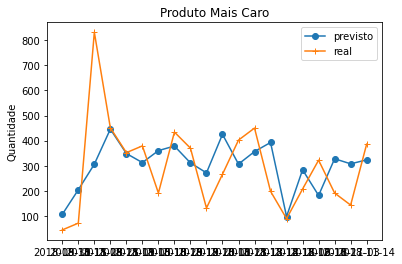

In [90]:
#importante ressaltar que grafico nao está na ordem cronologica
plt.plot(y_pred, label='previsto', marker='o')
plt.plot(y_test, label='real', marker='+')
plt.ylabel("Quantidade")
plt.title("Produto Mais Caro")
plt.legend()
plt.savefig('Aprendizado.svg')
plt.show()

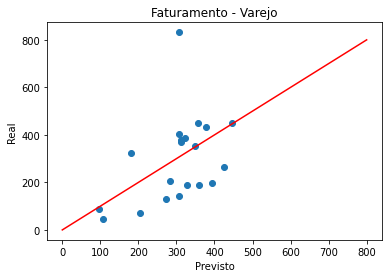

In [92]:
plt.scatter(y_pred,y_test)
plt.ylabel("Real")
plt.xlabel("Previsto")
plt.title("Faturamento - Varejo")

x = [0.0, 800.0]
plt.plot(x, x, color='red'); #reta onde y=x
plt.savefig('Scatter.svg')
plt.show()

# Calcular métricas de erro

In [93]:
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(y_pred,y_test))
print('RMSE: ', rmse)

RMSE:  160.31018040037262


In [94]:
#mse proximo de zero
mse = mean_squared_error(y_pred,y_test)
print('MSE: ',mse)

MSE:  25699.353940000008


In [ ]:
#deve ficar proximo a zero
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print('MAPE: ',mape, '%')

In [96]:
#ideal que esteja proximo de 1
from sklearn.metrics import r2_score
r2_score(y_pred,y_test)

-2.108186679691717

# Previsão de 07 dias à frente

In [97]:
timesteps_to_predict = 7
#lag = df_prod_mais_caro.iloc[dataSize-window:dataSize,0].values
lag = X_test.iloc[dataSize-window:dataSize,0].values
lag = lag.reshape(1, -1)

predictions=[]
for i in range(timesteps_to_predict):
  prediction = regressor.predict(lag)
  predictions.append(prediction)

  lag = lag[0, 1:window]  
  lag = np.append(lag, prediction[0])
  lag = lag.reshape(1, -1)

ValueError: ignored

##Machine Learning

In [74]:
# treinar modelo
from sklearn.linear_model import LinearRegression

def train_and_predict(X_train, y_train, X_test):
  model = LinearRegression(normalize=True)
  model.fit(X_train, y_train);
  y_pred = model.predict(X_test) #inferência do teste
  return model, y_pred

model, y_pred = train_and_predict(X_train, y_train, X_test)

### Avaliar modelo treinado na base de teste

In [75]:
def evaluate(y_test, y_pred, X_test):  

  # R2
  from sklearn.metrics import r2_score
  r2 = r2_score(y_test, y_pred)
  print('R2: ', r2)

  n = len(y_test)
  p = X_test.shape[1]
  adj_r2 = 1-(1-r2)*(n-1)/(n-p-1)
  print('R2 ajustado: ', adj_r2)

evaluate(y_test, y_pred, X_test)

R2:  -0.0992555848325023
R2 ajustado:  1.0011331916939838


In [76]:
_, pval = f_regression(X_train, y_train)
pval

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


array([0.72771587, 0.9297529 , 0.67973058, ..., 0.63956715, 0.57759245,
       0.7251122 ])

## Backward Elimination

###Retirar State

In [77]:
X_train_1 = X_train.iloc[:, 0:3]
X_test_1 = X_test.iloc[:, 0:3]

In [78]:
# Gerar modelo e testar novamente
model_1, y_pred_1 = train_and_predict(X_train_1, y_train, X_test_1)
evaluate(y_test, y_pred_1, X_test_1)

R2:  -0.03254705501713007
R2 ajustado:  -0.22614962783284187


In [ ]:
_, pval = f_regression(X_train_1, y_train)
pval

###Retirar ADM

In [79]:
X_train_2 = X_train.iloc[:, [0,2]]
X_test_2 = X_test.iloc[:, [0,2]]

In [80]:
# Gerar modelo e testar novamente
model_2, y_pred_2 = train_and_predict(X_train_2, y_train, X_test_2)
evaluate(y_test, y_pred_2, X_test_2)

R2:  -0.03061005766024616
R2 ajustado:  -0.1518582997379223


In [81]:
_, pval = f_regression(X_train_2, y_train)
pval

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0.72771587, 0.67973058])

###Retirar Marketing

In [ ]:
X_train_3 = pd.DataFrame(X_train.loc[:,'R&D Spend'])  # coloca em um dataframe para manter duas dimensões e não dar erro no treinamento
X_test_3 = pd.DataFrame(X_test.loc[:,'R&D Spend'])

In [ ]:
# Gerar modelo e testar novamente
model_3, y_pred_3 = train_and_predict(X_train_3, y_train, X_test_3)
evaluate(y_test, y_pred_3, X_test_3)

In [ ]:
_, pval = f_regression(X_train_3, y_train)
pval

## Modelo com maior R2 ajustado: model_2

Parâmetros do modelo ajustado

In [ ]:
model_2.intercept_

In [ ]:
model_2.coef_

Modelo:

Profit = 47662.77046436914 + 0.79827194 * R&D Spend + 0.02581271 *	Marketing Spend

In [ ]:
#previsto vs. real
plt.scatter(x=y_test, y=y_pred_2)
plt.title('Previsto vs Real')
plt.xlabel('Real')
plt.ylabel('Previsto')

x = [min(y_test), max(y_test)]
plt.plot(x, x, color='red'); #reta onde y=x